# Inspect GeoJSON File

Load and examine the structure and bounds of a GeoJSON file.

In [12]:
import geopandas as gpd
from pathlib import Path

# Load the GeoJSON file
geojson_path = Path("../tests/assets/test_fire.geojson")
gdf = gpd.read_file(geojson_path)

# Display basic information
print(f"Number of features: {len(gdf)}")
print(f"CRS: {gdf.crs}")
print(f"\nColumns: {list(gdf.columns)}")
print(f"\nGeometry types: {gdf.geometry.type.unique()}")
print(f"\nBounds (total_bounds): {gdf.total_bounds}")
print(f"  West:  {gdf.total_bounds[0]:.6f}")
print(f"  South: {gdf.total_bounds[1]:.6f}")
print(f"  East:  {gdf.total_bounds[2]:.6f}")
print(f"  North: {gdf.total_bounds[3]:.6f}")

# Display the GeoDataFrame
gdf

Number of features: 1
CRS: EPSG:4326

Columns: ['Event_ID', 'irwinID', 'Incid_Name', 'Incid_Type', 'Map_ID', 'Map_Prog', 'Asmnt_Type', 'BurnBndAc', 'BurnBndLat', 'BurnBndLon', 'Ig_Date', 'Pre_ID', 'Post_ID', 'Perim_ID', 'dNBR_offst', 'dNBR_stdDv', 'NoData_T', 'IncGreen_T', 'Low_T', 'Mod_T', 'High_T', 'Comment', 'geometry']

Geometry types: ['Polygon']

Bounds (total_bounds): [-74.74877357  39.64016617 -74.61288495  39.7385503 ]
  West:  -74.748774
  South: 39.640166
  East:  -74.612885
  North: 39.738550


,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry
0,NJ3973407472120220619,400501E0-C028-41BA-BF7E-189BFAA0F876,MULLICA RIVER FIRE,Wildfire,10024293,MTBS,Initial,13082,39.689,-74.681,...,None,-27,11,-970,-150,30,306,600,None,"POLYGON ((-74.69252 39.68403, -74.6923 39.6837..."


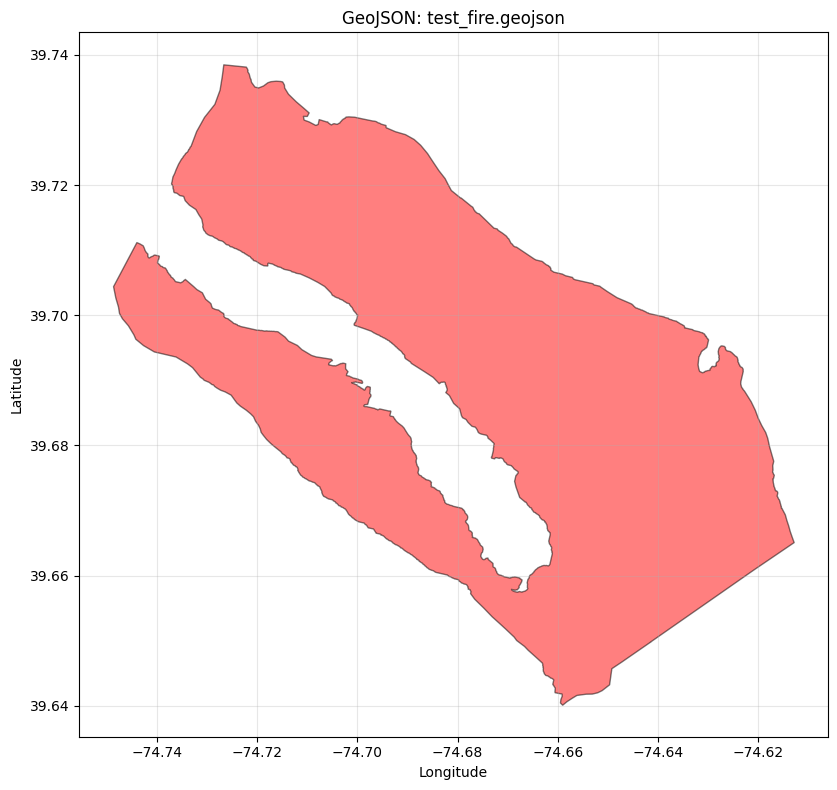


Feature attributes:


,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,Post_ID,Perim_ID,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment
0,NJ3973407472120220619,400501E0-C028-41BA-BF7E-189BFAA0F876,MULLICA RIVER FIRE,Wildfire,10024293,MTBS,Initial,13082,39.689,-74.681,...,901403220220704,None,-27,11,-970,-150,30,306,600,None


In [13]:
# Visualize the geometry
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, facecolor='red', edgecolor='black', alpha=0.5)
ax.set_title(f"GeoJSON: {geojson_path.name}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show attributes
print("\nFeature attributes:")
gdf.drop(columns='geometry').head()

## Query and Verify Sentinel-1 Coverage

Sentinel-1 Tiles Information:

Tile 1 (S1A_IW_GRDH_1SDV_20220620T225901_20220620T225926_043753_053941_D51D.SAFE):
  Shape: 16696 x 25633 pixels
  CRS: None
  Bounds (image coords): BoundingBox(left=0.0, bottom=16696.0, right=25633.0, top=0.0)

Tile 2 (S1A_IW_GRDH_1SDV_20220620T225926_20220620T225951_043753_053941_5399.SAFE):
  Shape: 16696 x 25643 pixels
  CRS: None
  Bounds (image coords): BoundingBox(left=0.0, bottom=16696.0, right=25643.0, top=0.0)

Fire GeoJSON:
  CRS: EPSG:4326
  Query BBox: [-74.748774, 39.640166, -74.612885, 39.738550]


/var/folders/6s/hsn58frd61b4y2ns9ln6mp080000gn/T/ipykernel_64053/3164730550.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


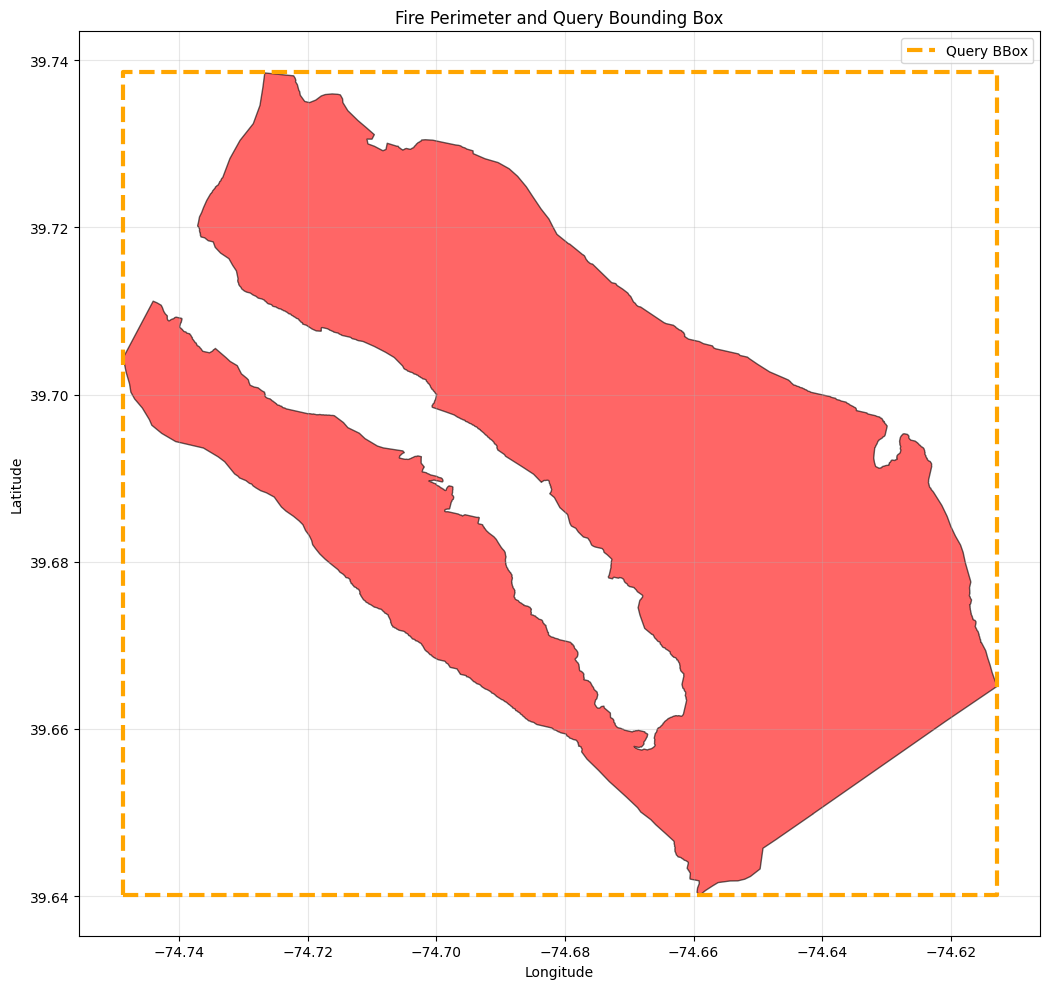


✓ The S1 images cover the fire area but don't have geographic CRS metadata
✓ Both tiles are from the same satellite pass (orbit 043753)
✓ Query used fire bbox: W=-74.7488, S=39.6402, E=-74.6129, N=39.7386


In [21]:
# Compare both S1 tiles with fire area
import rasterio
from shapely.geometry import box

# The S1 images don't have proper CRS, so we'll just verify coverage
s1_paths = [
    Path("../tests/assets/S1A_IW_GRDH_1SDV_20220620T225901_20220620T225926_043753_053941_D51D.SAFE/measurement/s1a-iw-grd-vv-20220620t225901-20220620t225926-043753-053941-001.tiff"),
    Path("../tests/assets/S1A_IW_GRDH_1SDV_20220620T225926_20220620T225951_043753_053941_5399.SAFE/measurement/s1a-iw-grd-vv-20220620t225926-20220620t225951-043753-053941-001.tiff")
]

print("Sentinel-1 Tiles Information:")
for i, path in enumerate(s1_paths, 1):
    with rasterio.open(path) as src:
        print(f"\nTile {i} ({path.parent.parent.name}):")
        print(f"  Shape: {src.shape[0]} x {src.shape[1]} pixels")
        print(f"  CRS: {src.crs}")
        print(f"  Bounds (image coords): {src.bounds}")

# Create GeoJSON bbox
bounds = gdf.total_bounds
bbox_geom = box(bounds[0], bounds[1], bounds[2], bounds[3])
print(f"\nFire GeoJSON:")
print(f"  CRS: {gdf.crs}")
print(f"  Query BBox: [{bounds[0]:.6f}, {bounds[1]:.6f}, {bounds[2]:.6f}, {bounds[3]:.6f}]")

# Visualize just the fire and query bbox (S1 tiles don't have proper geocoding)
bbox_gdf = gpd.GeoDataFrame({'name': ['Query BBox']}, geometry=[bbox_geom], crs=gdf.crs)

fig, ax = plt.subplots(figsize=(12, 10))
bbox_gdf.boundary.plot(ax=ax, color='orange', linewidth=3, linestyle='--', label='Query BBox')
gdf.plot(ax=ax, facecolor='red', edgecolor='black', alpha=0.6, label='Fire')
ax.set_title("Fire Perimeter and Query Bounding Box")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ The S1 images cover the fire area but don't have geographic CRS metadata")
print(f"✓ Both tiles are from the same satellite pass (orbit 043753)")
print(f"✓ Query used fire bbox: W={bounds[0]:.4f}, S={bounds[1]:.4f}, E={bounds[2]:.4f}, N={bounds[3]:.4f}")